# Notes

### Questions to be answered:
**For CEO-**
1. Which region is generating the highest revenue, and which region is generating the lowest?
2. What is the monthly trend of revenue, which months have faced the biggest increase/decrease?
3. Which months generated the most revenue? Is there a seasonality in sales?
4. Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?

**For CMO-**
1. What is the percentage of customers who are repeating their orders? Are they ordering the same products or different?
2. For the repeat customers, how long does it take for them to place the next order after being delivered the previous one?
3. What revenue is being generated from the customers who have ordered more than once?
4. Who are the customers that have repeated the most? How much are they contributing to revenue?


In [1]:
import pandas as pd
import xlrd

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.sample(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
480406,577300,23301,GARDENERS KNEELING PAD KEEP CALM,5,2011-11-18 12:53:00,1.65,16924.0,United Kingdom
433175,573904,23509,MINI PLAYING CARDS FUN FAIR,1,2011-11-01 14:54:00,0.42,14505.0,United Kingdom
344326,567024,20723,STRAWBERRY CHARLOTTE BAG,29,2011-09-16 11:23:00,2.46,NaN,United Kingdom
196335,553838,35809A,ENAMEL PINK TEA CONTAINER,12,2011-05-19 12:10:00,0.83,12620.0,France
55356,540992,22492,MINI PAINT SET VINTAGE,36,2011-01-12 16:57:00,0.65,17364.0,United Kingdom
254865,559337,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2011-07-07 16:27:00,5.79,NaN,United Kingdom
46648,540356,22356,CHARLOTTE BAG PINK POLKADOT,2,2011-01-06 15:12:00,2.51,NaN,United Kingdom
491449,578067,85099C,JUMBO BAG BAROQUE BLACK WHITE,1,2011-11-22 15:43:00,4.13,NaN,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [7]:
df.shape

(531285, 8)

In [3]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [4]:
filtered_q = df[df['Quantity'] < 1]
filtered_q

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
filtered_up = df[df['UnitPrice'] < 0]
filtered_up

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [12]:
df.drop(df[df['Quantity'] < 1].index, inplace=True)
df.drop(df[df['UnitPrice'] < 0].index, inplace=True)

In [13]:
df.shape

(531283, 8)

### Question 1
The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

In [15]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']
total_revenue = df['Revenue'].sum()

print(total_revenue)

10666684.543999996


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Month Name'] = df['InvoiceDate'].dt.month_name()

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Year,Month Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,December


In [24]:
df[df['Year']==2011].count().sum()

5267235

In [26]:
df[df['Year']==2010].count().sum()

442927

In [27]:
d = df[df['Year']==2011].count().sum() - df[df['Year']==2010].count().sum()
d

4824308

In [28]:
df.shape

(531283, 11)

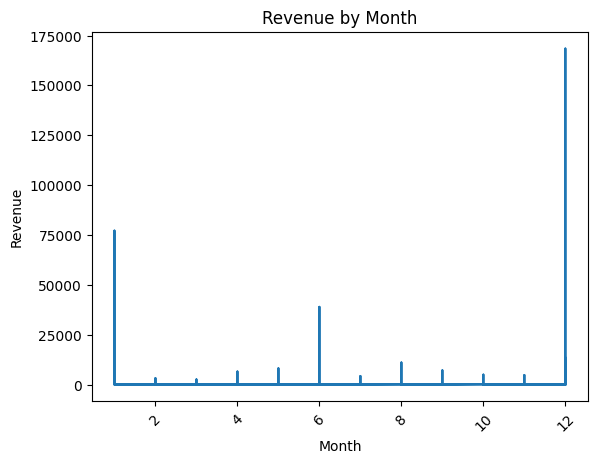

In [39]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')

# Rotate x-axis labels for better readability with many months
plt.xticks(rotation=45)
plt.show()